# Diabetes Predication 

## Classification Model

By Jenna Le Noble

### Introduction

The diabetes.csv dataset is from the National Institute of Diabetes and Digestive and Kidney
Diseases. It includes data on female patients of the age of 21 years and older of Pima Indian heritage. The purpose of this project is to predict whether a patient has diabetes based on certain characteristics and health measurements. The following column variables are described below:

- `pregnancies`: the number of pregnancies the patient has experienced
- `glucose`: glucose level in blood (mg/dL)
- `blood_pressure`: blood pressure measurement (mmHg)
- `skin_thickness`: thickness of skin (μm)
- `insulin`: insulin level in blood (pmol/L)
- `bmi`: body mass index (kg/m$^2$)
- `diabetes_pedrigee`: diabetes percentage
- `age`: age  of patient (years)
- `diabetes`: does the patient have diabetes (yes or no)

### Exploratory Data Analysis

In [14]:
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
options(repr.matrix.max.rows = 6)

In [16]:
diabetes_data <- read_csv("https://raw.githubusercontent.com/jennalenoble/diabetes_classification/main/diabetes.csv")

colnames(diabetes_data) <- c("pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "diabetes_pedrigree", "age", "diabetes")

diabetes_data <- mutate(diabetes_data, diabetes = as.factor(diabetes))

levels(diabetes_data$diabetes) <- c("no", "yes")

diabetes_data

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedrigree,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,yes
1,85,66,29,0,26.6,0.351,31,no
8,183,64,0,0,23.3,0.672,32,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,121,72,23,112,26.2,0.245,30,no
1,126,60,0,0,30.1,0.349,47,yes
1,93,70,31,0,30.4,0.315,23,no


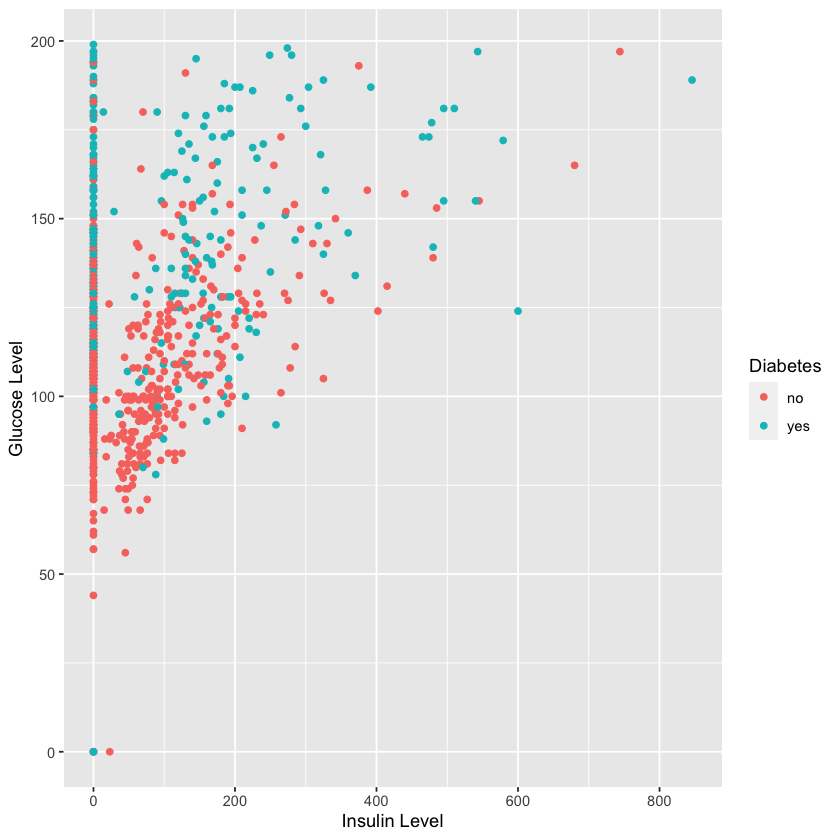

In [9]:
diabetes_plot <- diabetes_data %>%
    ggplot(aes(x = insulin, y = glucose)) +
        geom_point(aes(color = diabetes)) +
        labs(x = "Insulin Level", y = "Glucose Level", colour = "Diabetes")
diabetes_plot

In [10]:
diabetes_split <- initial_split(diabetes_data, prop = 0.75, strata = diabetes)  
diabetes_train <- training(diabetes_split)   
diabetes_test <- testing(diabetes_split)

In [11]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
       set_engine("kknn") |>
       set_mode("classification")

diabetes_data_recipe <- recipe(diabetes ~ ., data = diabetes_data) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())

diabetes_fit <- workflow() |>
          add_recipe(diabetes_data_recipe) |>
          add_model(knn_spec) |>
          fit(data = diabetes_data)

In [15]:
diabetes_test_predictions <- predict(diabetes_fit , diabetes_test) |>
       bind_cols(diabetes_test)
diabetes_test_predictions

.pred_class,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedrigree,age,diabetes
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
no,5,116,74,0,0,25.6,0.201,30,no
yes,10,168,74,0,0,38.0,0.537,34,yes
no,10,139,80,0,0,27.1,1.441,57,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
no,1,121,78,39,74,39.0,0.261,28,no
no,3,108,62,24,0,26.0,0.223,25,no
yes,0,123,72,0,0,36.3,0.258,52,yes
